# Modeling 

- to finish our modeling we decided that we want to drop the columns with high correlation to the target value 
- drop minute columns and resave the new csv 

In [109]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pprint import pprint
from time import time

import itertools
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, binarize
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

#KNN Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#decision trees Imports
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.externals.six import StringIO

#Random Forest Imports
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

In [77]:
df = pd.read_csv("data/uadata_cleaned.csv", index_col=0)
df.shape

(16023, 147)

In [78]:
df.columns

Index(['airportdelays>=20percent', 'year', 'month', 'total_arrival_flights',
       'tot_arr_delay_mins', 'carrier_delay_mins', 'weather_delay_mins',
       'nas_delay_mins', 'security_delay_mins', 'lateaircraft_delay_mins',
       ...
       'SPN', 'SRQ', 'STL', 'STT', 'SYR', 'TPA', 'TUL', 'TUS', 'TVC', 'TYS'],
      dtype='object', length=147)

In [79]:
df = df.drop(columns=['delaymins>=10000','total_arrival_flights','tot_arr_delay_mins', 'carrier_delay_mins', 'weather_delay_mins','nas_delay_mins', 'security_delay_mins', 'lateaircraft_delay_mins'])

# Train Test Split 

In [80]:
X = df.drop(columns= ['%on_time', '%delay_aircarrier', '%delay_weather',
       '%delay_nas', '%delay_sec', '%delay_lateaircraft', '%cancelled',
       '%diverted'])

In [81]:
#creating matrix of features 
X = X.drop('airportdelays>=20percent', axis = 1)
#assigning target variable 
y = df['airportdelays>=20percent']
#creating a list of features
feature_cols = X.columns

In [82]:
# Use x and y variables to split the training data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2,random_state=42)

**Model 1 - LOG REGRESSION**

In [66]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [68]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.5856474258970359


In [69]:
y_test.value_counts()

1.0    1631
0.0    1574
Name: airportdelays>=20percent, dtype: int64

In [71]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 861  713]
 [ 615 1016]]


**Model 2 - KNN**

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [73]:
f1_score(y_test, y_predict, average='weighted')

0.6486107786609455

In [74]:
print(confusion_matrix(y_test, y_predict, labels=None, sample_weight=None))
print(classification_report(y_test, y_predict))

[[1004  576]
 [ 550 1075]]
              precision    recall  f1-score   support

         0.0       0.65      0.64      0.64      1580
         1.0       0.65      0.66      0.66      1625

    accuracy                           0.65      3205
   macro avg       0.65      0.65      0.65      3205
weighted avg       0.65      0.65      0.65      3205



In [75]:
k_range = list(range(1, 11))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.6486107786609455, 0.638703789210764, 0.7121288988109655, 0.6935987037463456, 0.708111975220456, 0.6916859095920507, 0.715408590398428, 0.7000590100237118, 0.702611968037237, 0.6881178179775224]


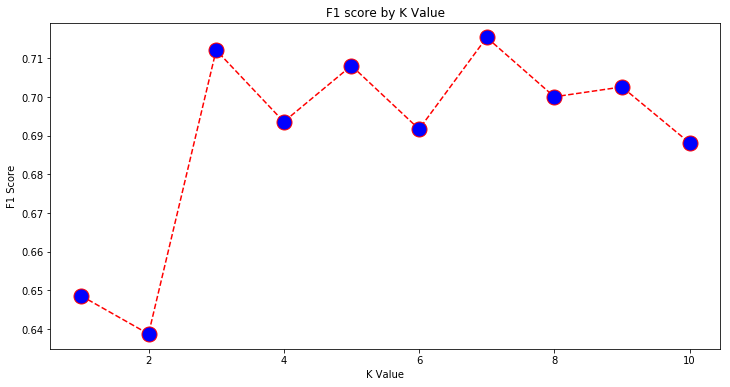

In [76]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 11), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=15)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

**Model 3 - Decision Trees**

- rerun train test split cells before running decision trees

In [83]:
ctree=DecisionTreeClassifier(max_depth = 10)
ctree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

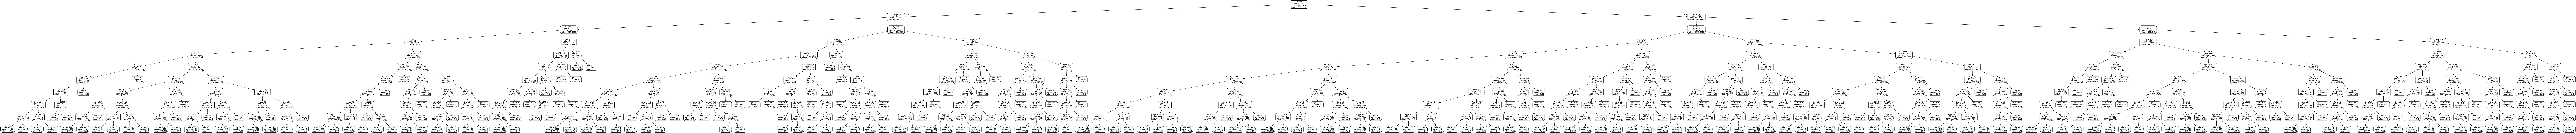

In [84]:
dot_data = StringIO()
export_graphviz(ctree, out_file=dot_data,rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [85]:
clasPred = ctree.predict(X_test)

In [86]:
accuracy_score(y_test, clasPred)

0.7575663026521061

[0.521374716414214, 0.4292415983451752, 0.45726972600531307, 0.4300149999649534, 0.413779874346088, 0.4016056037252249, 0.35772833085280953, 0.335069115882128, 0.33275907455044884]


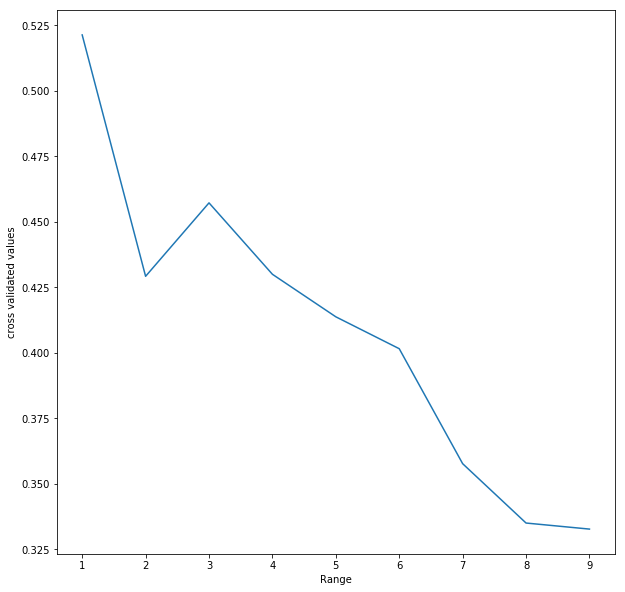

In [87]:
score = cross_val_score(ctree, X, y, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, X, y, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('Range')
plt.ylabel('cross validated values')
plt.show()

# Random Forest 

In [88]:
clf = RandomForestClassifier(n_estimators=100, max_depth=8,random_state=1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [89]:
print(clf.feature_importances_)

[4.19186522e-01 3.31337612e-01 0.00000000e+00 1.87908463e-03
 1.39363910e-03 5.11004630e-03 2.41597725e-04 1.03364288e-04
 1.15907428e-04 2.45060086e-05 0.00000000e+00 9.11338280e-05
 0.00000000e+00 3.69936282e-04 7.05367653e-05 1.62490091e-02
 0.00000000e+00 3.42997769e-03 2.28074532e-03 1.85988481e-03
 2.42809007e-04 0.00000000e+00 1.68415850e-03 0.00000000e+00
 3.70733652e-04 0.00000000e+00 3.43065590e-04 1.05734965e-03
 8.60403052e-05 2.90819224e-04 3.09182105e-03 5.93215197e-04
 2.54821631e-02 1.73117605e-04 3.86128952e-04 7.41512263e-05
 3.47013212e-04 5.45695672e-04 0.00000000e+00 0.00000000e+00
 1.08575601e-02 5.95232750e-04 2.64247414e-05 0.00000000e+00
 1.26287769e-03 3.07972453e-03 1.48716092e-04 5.37408130e-04
 1.68928572e-03 0.00000000e+00 4.98507461e-04 1.83000560e-04
 9.05739195e-04 2.42837752e-03 2.69302658e-02 1.12817570e-03
 0.00000000e+00 0.00000000e+00 5.43156575e-04 1.18058953e-03
 1.61598111e-04 5.78454498e-05 7.23110154e-05 9.28378359e-03
 1.25692049e-03 2.751790

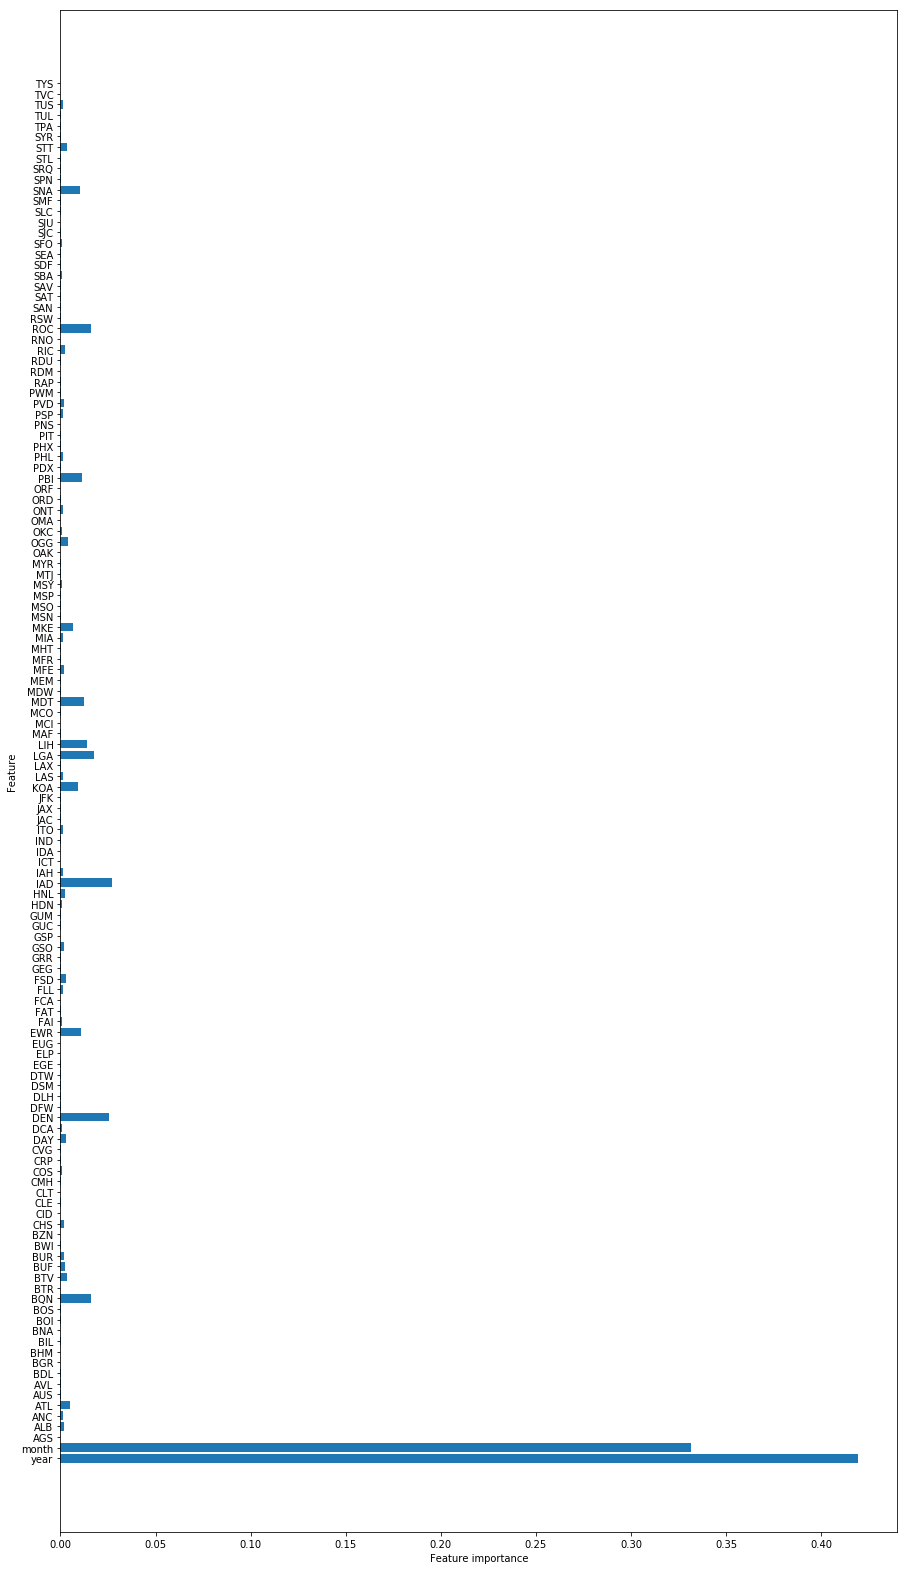

In [91]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,28))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(clf)

In [92]:
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1063  511]
 [ 407 1224]]
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70      1574
         1.0       0.71      0.75      0.73      1631

    accuracy                           0.71      3205
   macro avg       0.71      0.71      0.71      3205
weighted avg       0.71      0.71      0.71      3205



In [93]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 71.36%


# Bagging 

In [95]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=10), n_estimators=20)
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

In [96]:
bagged_tree.score(X_train, y_train)

0.7879544390700577

In [97]:
bagged_tree.score(X_test, y_test)

0.7684867394695788

# Base model = Forest

In [98]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 10)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
forest.score(X_train, y_train)

0.7529255734123889

In [100]:
forest.score(X_test, y_test)

0.7213728549141966

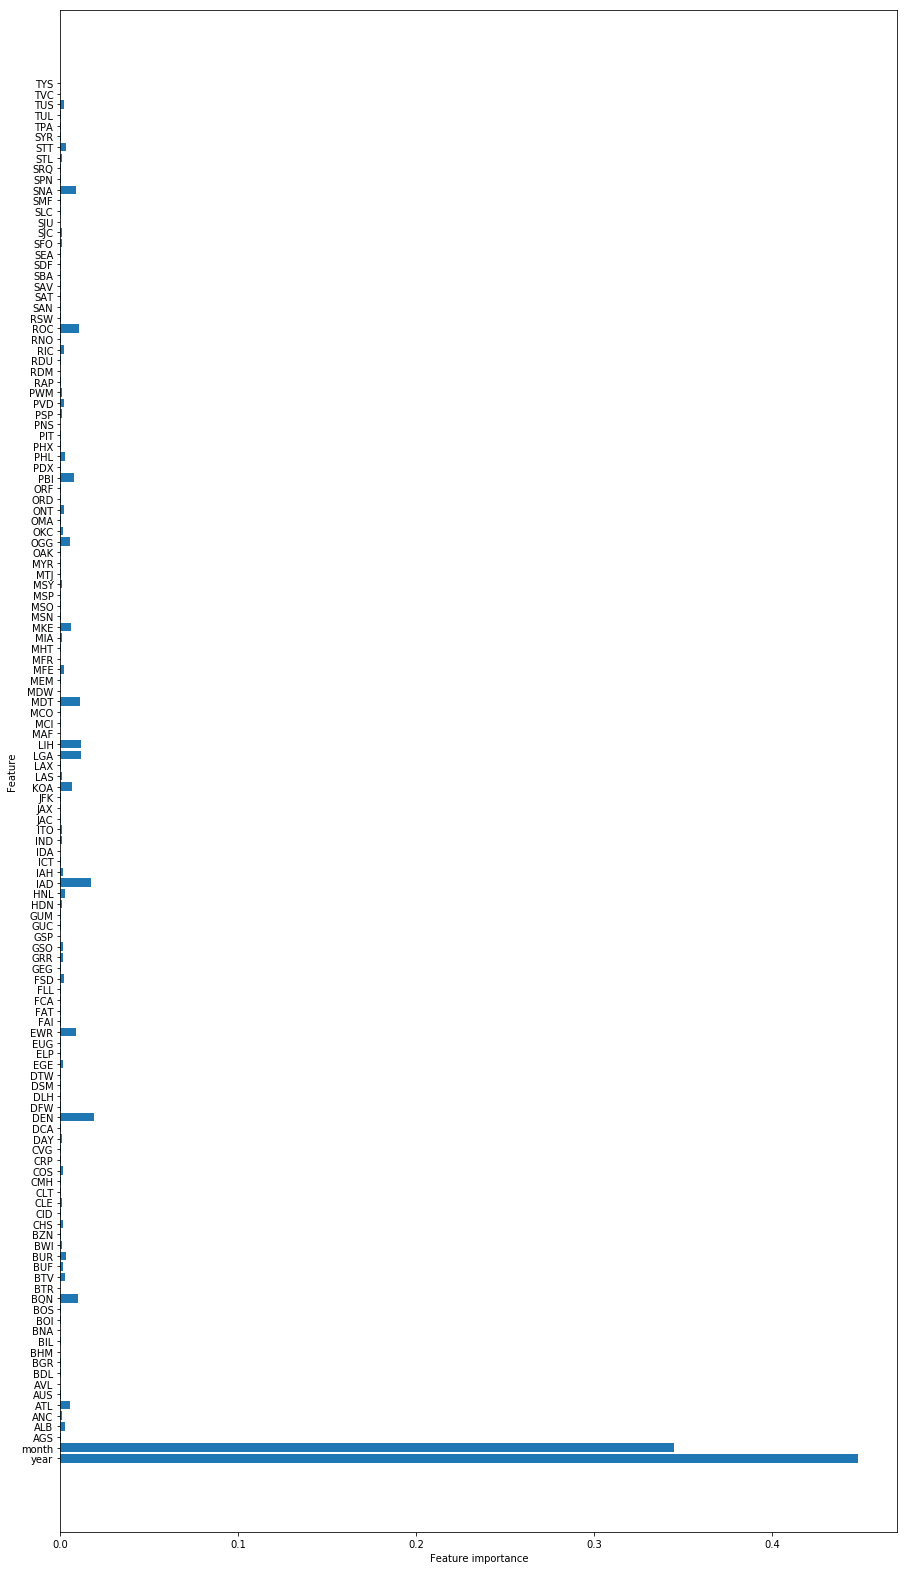

In [101]:
plot_feature_importances(forest)

In [102]:
# Look at the trees in your forest
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 100, max_depth= 10)
forest_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=100, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
rf_tree_1 = forest_2.estimators_[0]

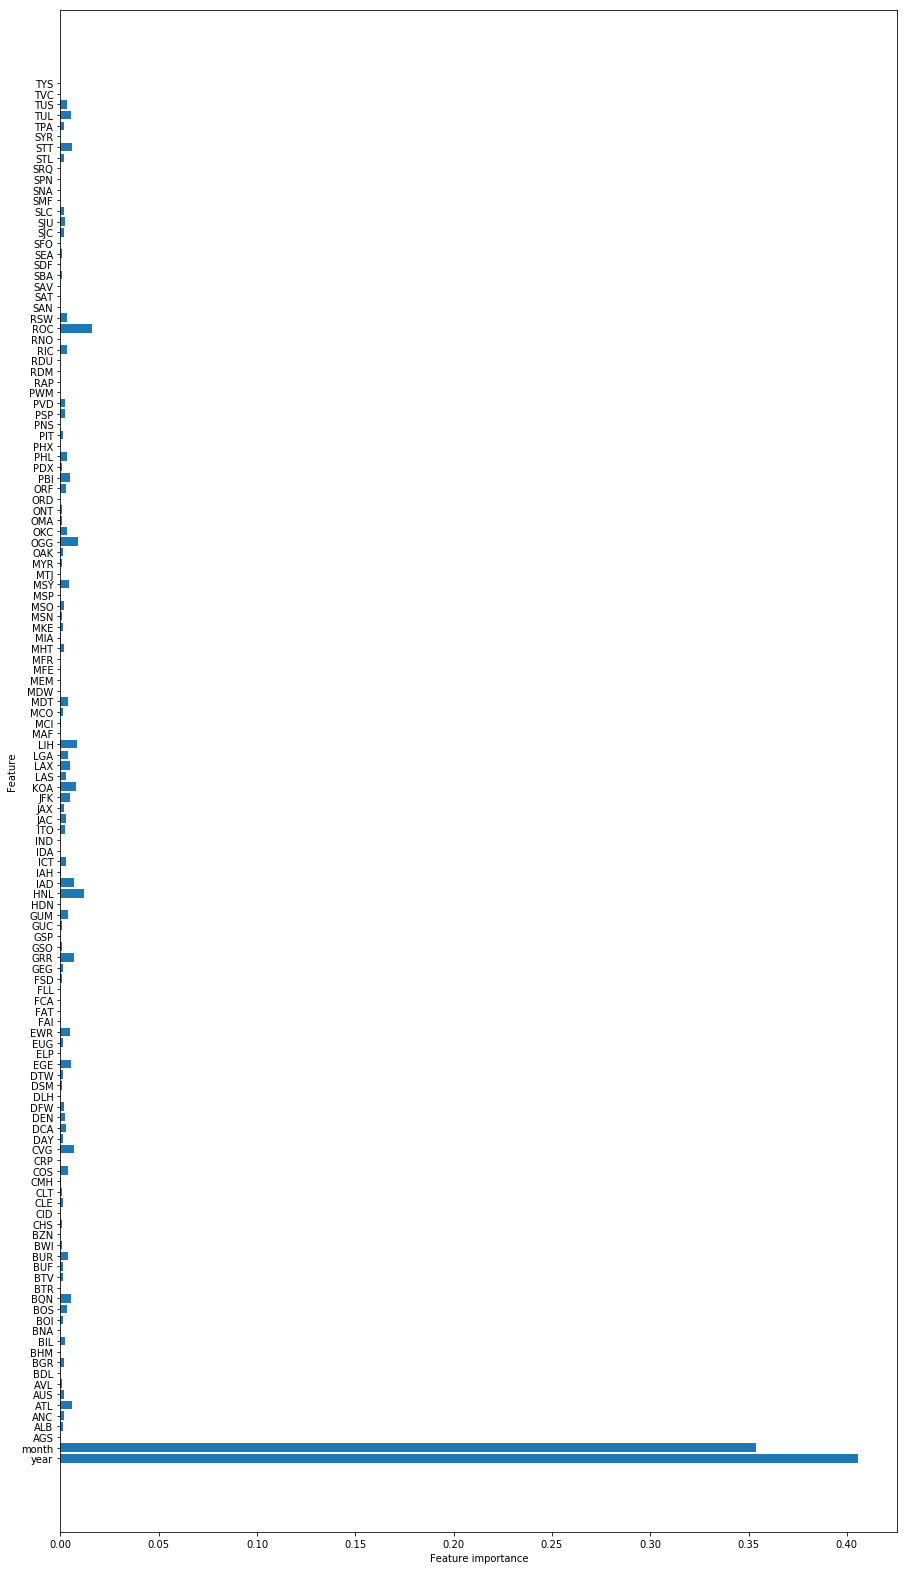

In [104]:
plot_feature_importances(rf_tree_1)

**Grid Search**

In [106]:
display(X.describe())

,year,month,AGS,ALB,ANC,ATL,AUS,AVL,BDL,BGR,...,SPN,SRQ,STL,STT,SYR,TPA,TUL,TUS,TVC,TYS
count,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,...,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000
mean,2011.347563,6.458216,0.000312,0.011983,0.009861,0.012170,0.012170,0.001373,0.012170,0.000374,...,0.001248,0.004244,0.011483,0.010984,0.001061,0.012170,0.010922,0.007676,0.000499,0.001373
std,4.848996,3.432733,0.017663,0.108811,0.098814,0.109648,0.109648,0.037030,0.109648,0.019348,...,0.035309,0.065009,0.106547,0.104232,0.032556,0.109648,0.103938,0.087281,0.022340,0.037030
min,2003.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 70.16%


**Hyperparameter Tuning**

1. Combinatoric Grid Searching

In [112]:
clf = RandomForestClassifier(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


**Cross Validation**
- Random Hyperparameter Grid

In [113]:
# Number of trees in random forest
n_estimators = [int(X) for X in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(X) for X in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [114]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [115]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 21.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [116]:
clf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

**Evaluate Random Search**

In [ ]:
base_model = RandomForestClassifier(n_estimators=800,max_depth = 10, random_state = 42)
base_model.fit(X_train, y_train)

In [ ]:
trainbase_accscore = base_model.score(X_train, y_train)
trainbase_accscore

In [ ]:
testbase_accscore = base_model.score(X_test, y_test)
testbase_accscore

In [ ]:
better_model = RandomForestClassifier(n_estimators= 1000, min_samples_split = 2, max_features=1, max_depth=15, bootstrap=False, random_state=38)
better_model.fit(X_train, y_train)

In [ ]:
trainbetter_accscore = better_model.score(X_train, y_train)
trainbetter_accscore

In [ ]:
testbetter_accscore = better_model.score(X_test, y_test)
testbetter_accscore